In [1]:
from PIL import Image
from sam.lang_sam import LangSAM

In [2]:
from sam.sam import SAM

sam = SAM("./sam/sam_vit_h_4b8939.pth")

model = LangSAM(sam.predictor)

Loading pth...DONE


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased
Model loaded from C:\Users\HP\.cache\huggingface\hub\models--ShilongLiu--GroundingDINO\snapshots\a94c9b567a2a374598f05c584e96798a170c56fb\groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


In [24]:
image_pil = Image.open("sam/truck.jpg").convert("RGB")
text_prompt = "truck"

In [25]:
masks, boxes, phrases, logits = model.predict(image_pil, text_prompt)

c:\Python311\Lib\site-packages\transformers\modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\torch\utils\checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


In [43]:
def getTopMask(masks, logits):
    max_logit = 0
    max_index = 0
    for i in range(len(masks)):
        if logits[i].item() > max_logit:
            max_logit = logits[i].item()
            max_index = i

    return masks[max_index], max_logit

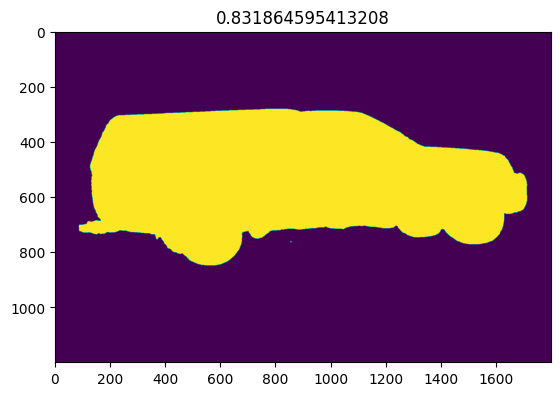

In [44]:
from matplotlib import pyplot as plt

mask, logit = getTopMask(masks, logits)

plt.imshow(mask)
plt.title(logit)
plt.show()

In [71]:
import numpy as np
import cv2

def shrink(mask, n):
    # shrink mask by n pixels
    kernel = np.ones((2*n+1, 2*n+1), np.uint8)
    eroded_mask = cv2.erode(mask, kernel, iterations=1)

    return eroded_mask


def sample_points_from_mask(mask, k):
    # randomly sample k points from the mask
    y_indices, x_indices = np.where(mask == 1)
    points = np.array(list(zip(x_indices, y_indices)))
    
    if k > len(points):
        raise ValueError("Not enough points to sample from")
    
    # Randomly select k points
    sampled_points = points[np.random.choice(len(points), k, replace=False)]
    
    return np.array(sampled_points)

[[ 568  403]
 [1403  493]
 [ 237  381]
 [1083  305]
 [ 648  582]]


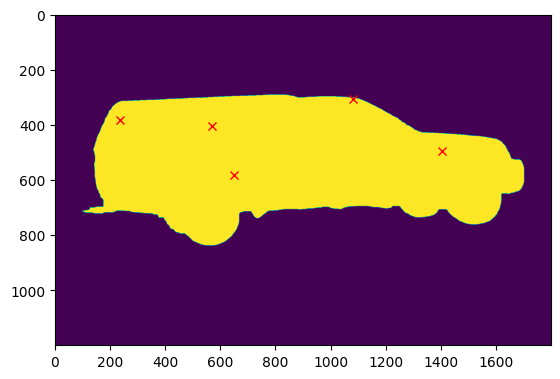

In [74]:
mask_np = np.uint8(mask.numpy())

mask_shrunk = shrink(mask_np, 10)

samples = sample_points_from_mask(mask_shrunk, 5)
print(samples)

plt.imshow(mask_shrunk)
plt.plot(samples[:, 0], samples[:, 1], 'rx')
plt.show()

